In [1]:
import skimage.io as io
import skimage.color as color
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from collections import deque,Counter
from skimage.filters.rank import majority


In [2]:
def majority_filter(image,filter):
  cnt=0
  for i in range(0,filter.shape[0]):
    for j in range(0,filter.shape[0]):
      if image[i][j]==255:
        cnt+=1
  return 255 if cnt>4 else 0

def morpholgy_op(img):
  th=threshold_otsu(img)
  binary = img
  binary=np.where(binary>th,255,0)
  dim=3
  filter=np.ones((dim,dim))
  height=img.shape[0]
  width=img.shape[1]
  cleaned=binary
  #return majority(binary,filter)

  for i in range((int)(dim/2),height-(int)(dim/2)):
    for j in range((int)(dim/2),width-(int)(dim/2)):
      cleaned[i][j]=majority_filter(binary[i-1:i+2,j-1:j+2],filter)
      #1 if np.count_nonzero((np.sum(filter,binary[height-1:height+2,width-1:width+2]))==2)>4 else 0

  return cleaned

In [3]:
path='/content/drive/MyDrive/DIP/Assignment01/'
img=io.imread(path+'input/NoisyImage.png',as_gray=True)
plt.figure(figsize=[10,20])
clean_img=morpholgy_op(img)
plt.imshow(clean_img,cmap='gray')
plt.imsave(path+'output/clean_img.png',clean_img,cmap='gray')

<Figure size 720x1440 with 0 Axes>

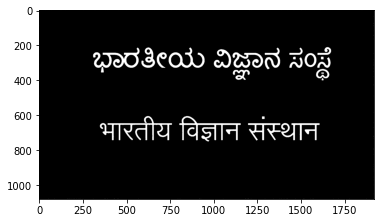

In [4]:
plt.imshow(clean_img,cmap='gray')